# Optimal Bayes Classifier

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Define prob $P(y|x)$ with $y\in\{0,1\}$

\begin{align}P(y=1|x_1,x_2)=\Big\{\begin{array}{cc}
            p, &x_1^2+x_2^2\geq 1\\
            q, &x_1^2+x_2^2< 1
\end{array}
\end{align}


In [2]:
def prob(x,p=0.7,q=0.3): #prob of y=1
    
    if x[0]**2+x[1]**2>=1:
        return p
    else:
        return q

#### color $y=1$:blue and $y=0$:red

In [3]:
def color(p):
    
    if np.random.rand()<=prob(p):
        return 'blue' #y=1
    else:
        return 'red' #y=0

### Hypotheses to compare

In [4]:
def bayes(x): #Bayes optimal
    if prob(x)>=0.5:
        return 'blue'
    else:
        return 'red'

In [5]:
def h(x,r=1.2): #choose radius; if r=1 then h(x)=h_bayes(x)
    if x[0]**2+x[1]**2>=1.2:
        return 'blue'
    else:
        return 'red'

#### Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
def GNB(df):
    model=GaussianNB()
    model.fit(df[['x','y']],df['sample'])
    y_pred=model.predict(df[['x','y']])
    
    return y_pred
    

### Run several samples and calculate errors

In [8]:
errors=[]

for i in range(1):
    sample= np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000)
    class_y=[color(p) for p in sample]
    
    df=pd.DataFrame(sample, columns=["x","y"])
    df['sample']=pd.Series(class_y) #sample
    df['h']=df[['x','y']].apply(h,1) #hypothesis h(x)
    df['h_bayes']=df[['x','y']].apply(bayes,1) #bayes hypo.    
    df['GNB']=GNB(df)
    
    error_h=(df['sample']!=df['h']).astype(int).mean()
    error_bayes=(df['sample']!=df['h_bayes']).astype(int).mean()
    error_GNB=(df['sample']!=df['GNB']).astype(int).mean()
    
    errors.append([error_h,error_GNB,error_bayes])

In [9]:
len([e for e in errors if e[0]<e[2] or e[1]<e[2]])

0

### Plot

In [10]:
sns.set()

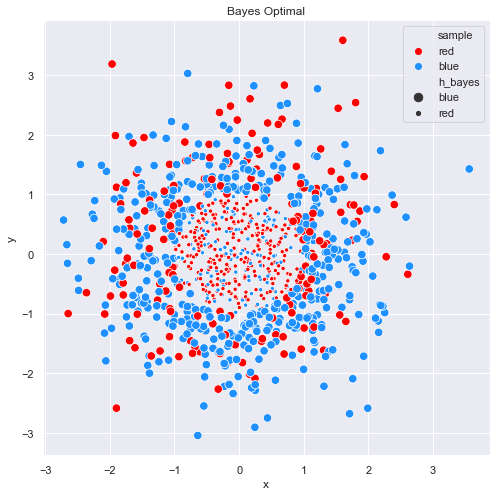

In [20]:
plt.figure(figsize=(8,8))
#sns.set_style("white")
plt.title('Bayes Optimal')
sns.scatterplot(data=df,x='x',y='y',hue='sample',size='h_bayes',palette={'blue':'dodgerblue','red':'red'})
plt.show()

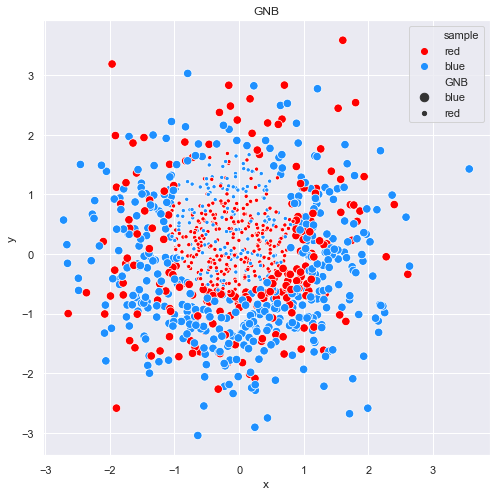

In [23]:
plt.figure(figsize=(8,8))
#sns.set_style("white")
plt.title('GNB')
sns.scatterplot(data=df,x='x',y='y',hue='sample',size='GNB',palette={'blue':'dodgerblue','red':'red'})
plt.show()

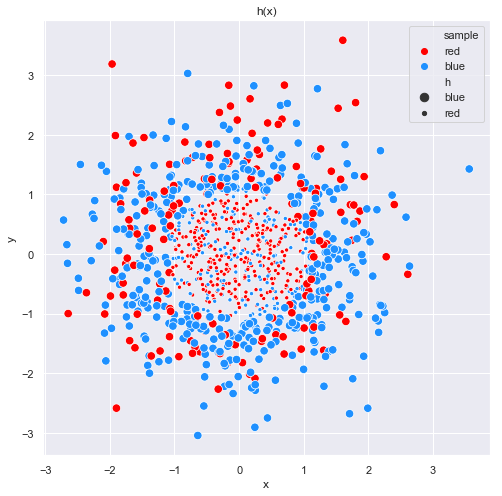

In [24]:
plt.figure(figsize=(8,8))
#sns.set_style("white")
plt.title('h(x)')
sns.scatterplot(data=df,x='x',y='y',hue='sample',size='h',palette={'blue':'dodgerblue','red':'red'})
plt.show()

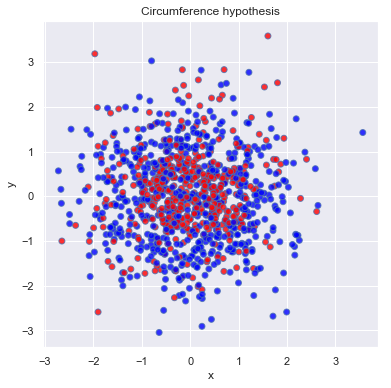

In [22]:
plt.figure(figsize=(6,6))
plt.title("Circumference hypothesis")
sns.regplot(data=df,x='x',y='y',scatter_kws={'facecolors':df['sample']},fit_reg=False)
plt.show()